In [1]:
import pandas as pd

# Chargement des données pour le vin rouge et blanc
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Affichage des premières lignes
print(df_red.head())
print(df_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Variables explicatives et cible
X_red = df_red.drop('quality', axis=1)
y_red = df_red['quality']

# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Entraînement du modèle de régression linéaire
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

# Prédictions
y_pred = model_lin.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.2f}, R² : {r2:.2f}")


MSE : 0.39, R² : 0.40


In [3]:
# Corrélation de Pearson pour le vin rouge
correlation_red = df_red.corr()
print(correlation_red)

# Corrélation de Pearson pour le vin blanc
correlation_white = df_white.corr()
print(correlation_white)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

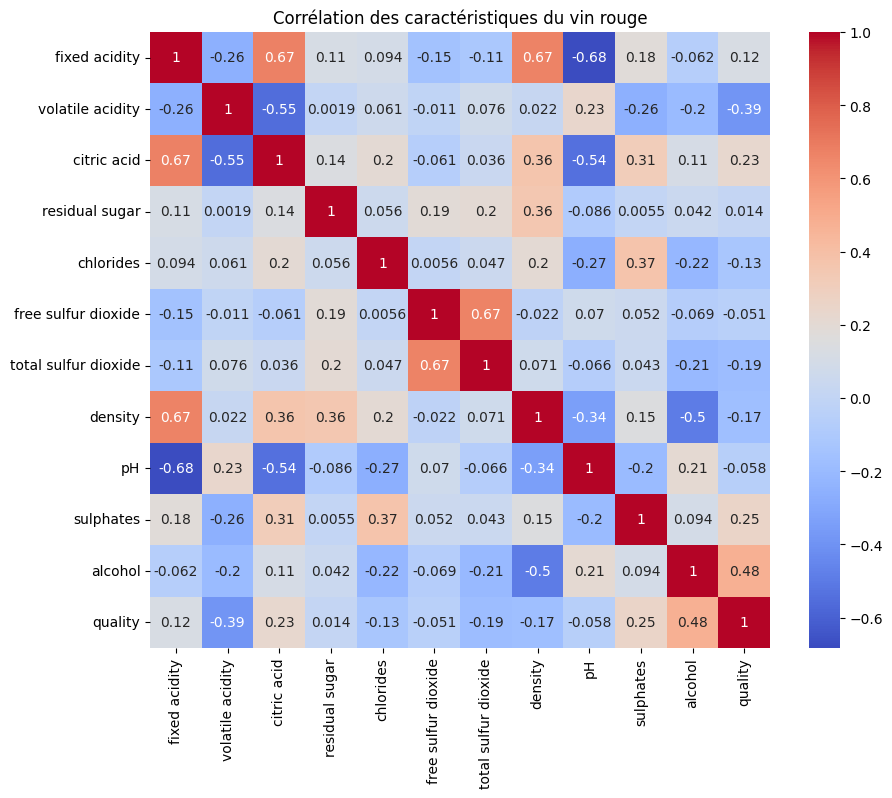

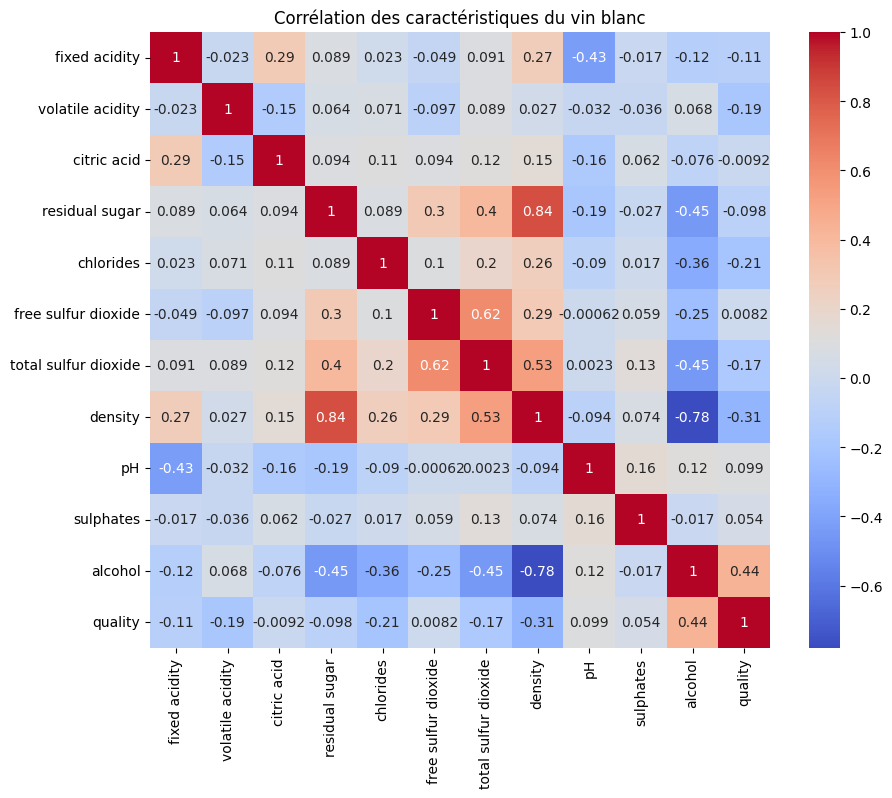

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap pour le vin rouge
plt.figure(figsize=(10,8))
sns.heatmap(correlation_red, annot=True, cmap='coolwarm')
plt.title('Corrélation des caractéristiques du vin rouge')
plt.show()

# Heatmap pour le vin blanc
plt.figure(figsize=(10,8))
sns.heatmap(correlation_white, annot=True, cmap='coolwarm')
plt.title('Corrélation des caractéristiques du vin blanc')
plt.show()


In [5]:
from sklearn.linear_model import Ridge

# Régression Ridge pour le vin rouge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Affichage des coefficients
print("Coefficients Ridge pour le vin rouge :", ridge.coef_)


Coefficients Ridge pour le vin rouge : [ 1.96137645e-02 -1.02152929e+00 -1.64270261e-01  6.23679545e-04
 -1.22677375e+00  5.68588748e-03 -3.56053037e-03 -1.11526006e-02
 -3.76222673e-01  7.46955766e-01  2.97591067e-01]


In [6]:
from sklearn.linear_model import Lasso

# Régression Lasso pour le vin rouge
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Affichage des coefficients
print("Coefficients Lasso pour le vin rouge :", lasso.coef_)


Coefficients Lasso pour le vin rouge : [ 0.02980405 -0.          0.         -0.         -0.          0.00653808
 -0.0041842  -0.         -0.          0.          0.25051756]
